In [ ]:
# Question 1

# 1. how many bytes loaded from memory
# BD + DF
# how many bytes written back
# BF

# Total OPs performed
# 2BDF

# Arithmetic intensity
# 2BDF / (BD + DF + BF)

# T_math = 2BDF / 3.94e14 bytes/s
# T_comm = (BD + DF + BF) / 8.1e11 bytes/s

In [ ]:
# Question 2
# bfloat16[B, D] * int8[D, F] -> bfloat16[B, F]
# T_math = 2BDF / 1.97e14
# T_comm = 2BD + DF + 2BF / 8.1e11

# T_math = T_comm
# 2BD + DF + 2BF / 8.1e11 = BDF / 1.97e14
# B(2D + 2F - 8e11/1.97e14 2DF) + DF = 0
# B ~= 1.97e14 / (8e11 * 2)
# 2B ~= 246.25
# B ~= 123.1

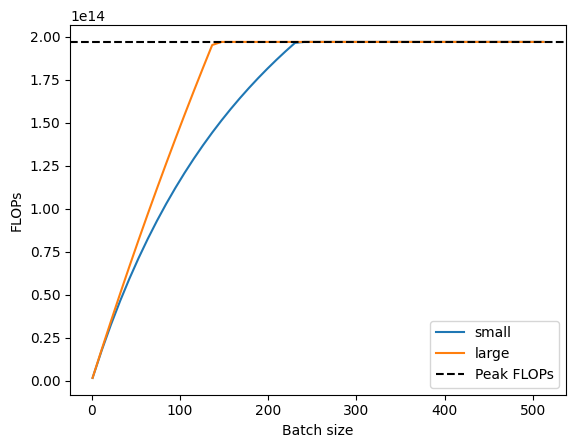

In [18]:
# Question 3
import numpy as np
import matplotlib.pyplot as plt

B = np.linspace(1, 512)
PEAK_FLOPS = 1.97e14


def roofline(B, d, f):
    math_bytes = 2 * B * d * f
    comm_bytes = 2 * B * d + d * f + 2 * B * f
    math_time = math_bytes / PEAK_FLOPS
    comm_time = comm_bytes / 8.1e11

    total_time = np.maximum(math_time, comm_time)
    flops = math_bytes / total_time
    return flops

d_small = 1024
f_small = 1024
flops_small = roofline(B, d_small, f_small)

d_large = 4096
f_large = 4096
flops_large = roofline(B, d_large, f_large)


plt.plot(B, flops_small, label='small')
plt.plot(B, flops_large, label='large')
plt.axhline(PEAK_FLOPS, color='black', linestyle='--', label='Peak FLOPs')
plt.xlabel('Batch size')
plt.ylabel('FLOPs')
plt.legend()
plt.show()


In [ ]:
# Question 4
# T_math = 2 * B * D * F / 3.94e14
# T_comm = B * D + B * D * F + BF / 8.11e11
# Time = max(T_math, T_comm)
# Arithmetic intensity = 2 * B * D * F / max(T_comm, T_math)
# ~= 2BDF / BDF = 2

In [ ]:
# Question 5
# Assume H100 is 1,979 * 1e12 / 2 = 989 * 1e12
# T_math = T_comm = 2BDF / (989 * 1e12) = (2BD + 2DF + 2BF) / 3.35e12
# 2BDF / 2DF = 989 * 1e12 / 3.35e12
# B = 295.22